In [35]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df_train.drop(columns=['Cabin','Ticket','Name'], inplace=True)

In [39]:
df_test.drop(columns=['Cabin','Ticket','Name'], inplace=True)

In [40]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [41]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [42]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [43]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [44]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [45]:
df_train['Embarked']=df_train['Embarked'].fillna(method = 'bfill')

In [46]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [47]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [48]:
df_train = pd.get_dummies(df_train,columns=['Sex','Embarked'])
df_test = pd.get_dummies(df_test,columns=['Sex','Embarked'])

In [49]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [50]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,-0.042939,0.042939,0.003072,-0.033606,0.018428
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.171485,0.003650,-0.152675
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.247223,0.221009,0.077891
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.084153,0.084153,0.039068,-0.013855,-0.025551
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.060751,-0.026354,0.069838
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.012400,-0.081228,0.061926
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.182333,-0.182333,0.271478,-0.117216,-0.164396
Sex_female,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,1.000000,-1.000000,0.086546,0.074115,-0.122476
Sex_male,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.086546,-0.074115,0.122476
Embarked_C,0.003072,0.171485,-0.247223,0.039068,-0.060751,-0.012400,0.271478,0.086546,-0.086546,1.000000,-0.148802,-0.783406


<AxesSubplot: >

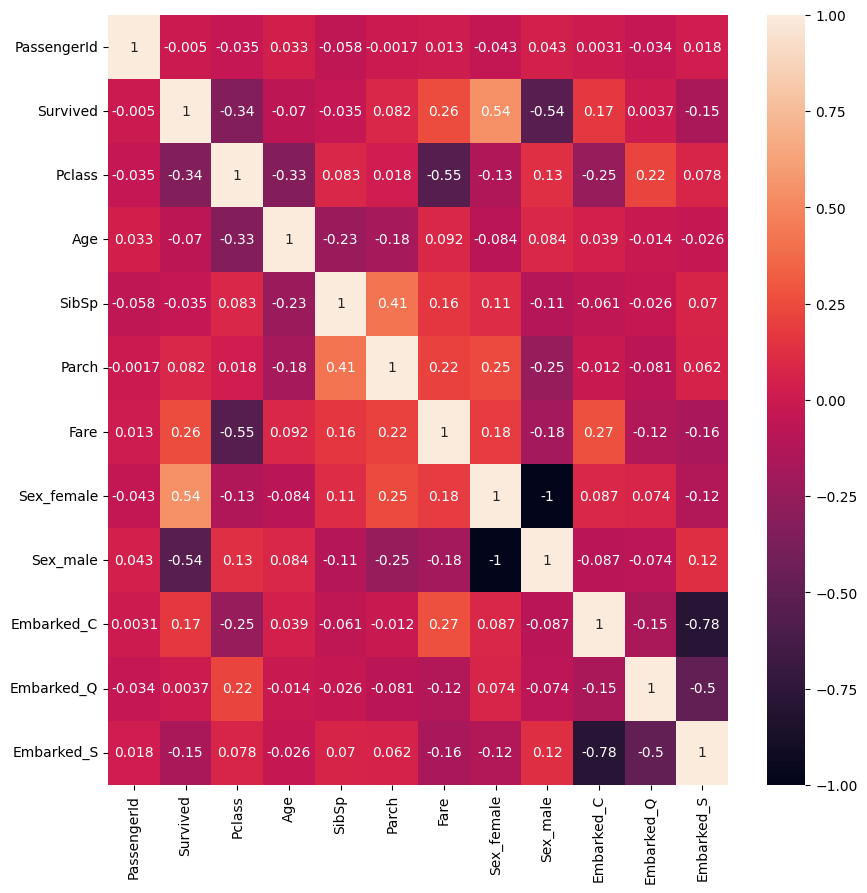

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)

In [52]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0,1,0,1,0
1,893,3,47.00000,1,0,7.0000,1,0,0,0,1
2,894,2,62.00000,0,0,9.6875,0,1,0,1,0
3,895,3,27.00000,0,0,8.6625,0,1,0,0,1
4,896,3,22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,1,0,0,1
414,1306,1,39.00000,0,0,108.9000,1,0,1,0,0
415,1307,3,38.50000,0,0,7.2500,0,1,0,0,1
416,1308,3,30.27259,0,0,8.0500,0,1,0,0,1


In [53]:
train = df_train.copy()
test = df_test.copy()

In [22]:
X = df_train.iloc[:,2:]
y = df_train['Survived']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[['Age', 'Fare']] = sc.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = sc.transform(X_test[['Age', 'Fare']])


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [80]:
lr = LogisticRegression()
lr_params = {
    'penalty': ['l1', 'l2'],
}

lr_grid = GridSearchCV(lr, lr_params)
lr_grid.fit(X_train, y_train)
print(lr_grid.best_params_)
print(lr_grid.best_estimator_,'\n\n')

lr = lr_grid.best_estimator_

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('accuracy_score = ',accuracy_score(y_pred_lr,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred_lr,y_test))
print(classification_report(y_test,y_pred_lr))

{'penalty': 'l2'}
LogisticRegression() 


accuracy_score =  0.8100558659217877
confusion_matrix 
 [[90 19]
 [15 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [81]:
#now for svm

svm = SVC()
svm_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(svm, svm_params)
svm_grid.fit(X_train, y_train)
print(svm_grid.best_params_)
print(svm_grid.best_estimator_,'\n\n')

svm = svm_grid.best_estimator_

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('accuracy_score = ',accuracy_score(y_pred_svm,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred_svm,y_test))
print(classification_report(y_test,y_pred_svm))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1) 


accuracy_score =  0.8156424581005587
confusion_matrix 
 [[92 20]
 [13 54]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [89]:
#now for k neighbours classifier
knc = KNeighborsClassifier()
knc_params = {
    'n_neighbors': [x for x in range(1,31)],
    'weights': ['uniform', 'distance'],
}


knc_grid = GridSearchCV(knc, knc_params)
knc_grid.fit(X_train, y_train)
print(knc_grid.best_params_)
print(knc_grid.best_estimator_,'\n\n')

knc = knc_grid.best_estimator_

knc.fit(X_train, y_train)
y_pred_knc = knc.predict(X_test)
print('accuracy_score = ',accuracy_score(y_pred_knc,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred_knc,y_test))
print(classification_report(y_test,y_pred_knc))

{'n_neighbors': 18, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=18) 


accuracy_score =  0.8100558659217877
confusion_matrix 
 [[93 22]
 [12 52]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [82]:
#do the same for decision tree classifier

dtc = DecisionTreeClassifier()
dtc_params = {
    'criterion': ['gini', 'entropy']
}

dtc_grid = GridSearchCV(dtc, dtc_params)
dtc_grid.fit(X_train, y_train)
print(dtc_grid.best_params_)
print(dtc_grid.best_estimator_,'\n\n')

dtc = dtc_grid.best_estimator_

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print('accuracy_score = ',accuracy_score(y_pred_dtc,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred_dtc,y_test))
print(classification_report(y_test,y_pred_dtc))

{'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy') 


accuracy_score =  0.7988826815642458
confusion_matrix 
 [[88 19]
 [17 55]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [145]:
#do the same for gaussianNB

gnb = GaussianNB()
gnb_params = {}

gnb_grid = GridSearchCV(gnb, gnb_params)
gnb_grid.fit(X_train, y_train)
print(gnb_grid.best_params_)
print(gnb_grid.best_estimator_,'\n\n')

gnb = gnb_grid.best_estimator_

gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print('accuracy_score = ',accuracy_score(y_pred_gnb,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred_gnb,y_test))
print(classification_report(y_test,y_pred_gnb))

{}
GaussianNB() 


accuracy_score =  0.776536312849162
confusion_matrix 
 [[81 16]
 [24 58]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       105
           1       0.71      0.78      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [83]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'criterion' : ['gini', 'entropy'],
}

rf_grid = GridSearchCV(rf, rf_params)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_,'\n\n')

rf = rf_grid.best_estimator_

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('accuracy_score = ',accuracy_score(y_pred_rf,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred_rf,y_test))
print(classification_report(y_test,y_pred_rf))

{'criterion': 'entropy', 'n_estimators': 70}
RandomForestClassifier(criterion='entropy', n_estimators=70) 


accuracy_score =  0.8044692737430168
confusion_matrix 
 [[90 20]
 [15 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [149]:
ada = AdaBoostClassifier()
ada_params = {
    'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate' : [0.001, 0.01, 0.1, 1]
}

ada_grid = GridSearchCV(ada, ada_params)
ada_grid.fit(X_train, y_train)
print(ada_grid.best_params_)
print(ada_grid.best_estimator_,'\n\n')

ada = ada_grid.best_estimator_

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print('accuracy_score = ',accuracy_score(y_pred_ada,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred_ada,y_test))
print(classification_report(y_test,y_pred_ada))

{'learning_rate': 0.1, 'n_estimators': 100}
AdaBoostClassifier(learning_rate=0.1, n_estimators=100) 


accuracy_score =  0.7988826815642458
confusion_matrix 
 [[91 22]
 [14 52]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.83       105
           1       0.79      0.70      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [84]:
gb = GradientBoostingClassifier()
gb_params = {
    'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'learning_rate' : [0.001, 0.01, 0.1, 1]
}

gb_grid = GridSearchCV(gb, gb_params)
gb_grid.fit(X_train, y_train)
print(gb_grid.best_params_)
print(gb_grid.best_estimator_,'\n\n')

gb = gb_grid.best_estimator_

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('accuracy_score = ',accuracy_score(y_pred_gb,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred_gb,y_test))
print(classification_report(y_test,y_pred_gb))

{'learning_rate': 0.1, 'n_estimators': 30}
GradientBoostingClassifier(n_estimators=30) 


accuracy_score =  0.7988826815642458
confusion_matrix 
 [[93 24]
 [12 50]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [85]:
import sklearn.ensemble
from sklearn.ensemble import VotingClassifier

In [91]:
model1 = lr
model2 = svm 
model3 = knc
model4 = rf
#model5 = ada


In [92]:
ensemble = VotingClassifier(estimators=[
    ('rf',model4),('svm',model2),('knc',model3)
])

In [93]:
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print('accuracy_score = ',accuracy_score(y_pred_ensemble,y_test))
print('confusion_matrix \n',confusion_matrix(y_pred_ensemble,y_test))
print(classification_report(y_test,y_pred_ensemble))

accuracy_score =  0.8268156424581006
confusion_matrix 
 [[95 21]
 [10 53]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [57]:
id = test['PassengerId']

In [58]:
id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [73]:
test.drop(columns='PassengerId', inplace=True)

In [99]:
final_pred = ensemble.predict(test)

In [100]:
final_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [101]:
submission = pd.DataFrame({'PassengerId': id.values, 'Survived': final_pred})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [102]:
submission.to_csv('submission5.csv',index=False)

In [97]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.452723,0,0,0.015282,0,1,0,1,0
1,3,0.617566,1,0,0.013663,1,0,0,0,1
2,2,0.815377,0,0,0.018909,0,1,0,1,0
3,3,0.353818,0,0,0.016908,0,1,0,0,1
4,3,0.287881,1,1,0.023984,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0.396975,0,0,0.015713,0,1,0,0,1
414,1,0.512066,0,0,0.212559,1,0,1,0,0
415,3,0.505473,0,0,0.014151,0,1,0,0,1
416,3,0.396975,0,0,0.015713,0,1,0,0,1


In [98]:
import numpy as np

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [69]:
numeric_columns = ["Age","Fare"]
for i in numeric_columns:
    test[i] = scaler.fit_transform(np.array(test[i]).reshape(-1,1))